<a href="https://colab.research.google.com/github/fabriziobasso/Colab_backup/blob/main/mod_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **S4E10 - LOAN APPROVAL**

In [5]:
%%capture
!pip install -qq pytorch_tabnet
!pip install optuna
!pip install catboost
!pip install optuna-integration-pytorch-tabnet

from pytorch_tabnet.tab_model import TabNetRegressor

!pip install --upgrade category-encoders
!pip install optuna-integration
!pip install colorama
#!pip install pyfiglet
!pip install keras-tuner --upgrade
!pip install keras-nlp
!pip install BorutaShap
!pip install --upgrade scikit-learn
!pip install scikit-lego
!pip install skops

from pytorch_tabnet.tab_model import TabNetRegressor

In [6]:
# Setup notebook
from pathlib import Path
import ipywidgets as widgets
import pandas as pd
import numpy as np
from pickle import load, dump
import json
import joblib
#import calplot as cal

# Graphic Libraries:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
# Set Style
sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5});
sns.despine(left=True, bottom=True, top=False, right=False);
mpl.rcParams['figure.dpi'] = 120;
mpl.rc('axes', labelsize=12);
plt.rc('xtick',labelsize=10);
plt.rc('ytick',labelsize=10);

mpl.rcParams['axes.spines.top'] = False;
mpl.rcParams['axes.spines.right'] = False;
mpl.rcParams['axes.spines.left'] = True;

# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)

# tool for Excel:
from openpyxl import load_workbook, Workbook
from openpyxl.drawing.image import Image
from openpyxl.styles import Border, Side, PatternFill, Font, GradientFill, Alignment
from openpyxl.worksheet.cell_range import CellRange

from openpyxl.formatting import Rule
from openpyxl.styles import Font, PatternFill, Border
from openpyxl.styles.differential import DifferentialStyle

# Bloomberg
#from xbbg import blp
from catboost import CatBoostRegressor, Pool, CatBoostClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from xgboost.callback import EarlyStopping

import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping,
                      record_evaluation,
                      log_evaluation)

# Time Management
from tqdm import tqdm
from datetime import date
from datetime import datetime
from pandas.tseries.offsets import BMonthEnd, QuarterEnd
import datetime
from pandas.tseries.offsets import BDay # BDay is business day, not birthday...
import datetime as dt
import click
import glob
import os
import gc
import re
import string

from ipywidgets import AppLayout
from ipywidgets import Dropdown, Layout, HTML, AppLayout, VBox, Label, HBox, BoundedFloatText, interact, Output

#from my_func import *

import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour

os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import keras
from keras import ops
from keras import layers

from keras.layers import Input, LSTM, Dense, Lambda, RepeatVector, Reshape
from keras.models import Model
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError

from keras.utils import FeatureSpace, plot_model

# Import libraries for Hypertuning
import keras_tuner as kt
from keras_tuner.tuners import RandomSearch, GridSearch, BayesianOptimization

#from my_func import *

# preprocessing modules
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, RepeatedKFold, cross_val_score, cross_validate, GroupKFold, GridSearchCV, RepeatedStratifiedKFold, cross_val_predict

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   QuantileTransformer,
                                   PolynomialFeatures)

# metrics
import sklearn
#import skops.io as sio
from sklearn.metrics import (mean_squared_error,
                             root_mean_squared_error,
                             root_mean_squared_log_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             accuracy_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             log_loss,
                             make_scorer)
# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  HuberRegressor,
                                  TweedieRegressor,
                                  QuantileRegressor,
                                  ARDRegression,
                                  TheilSenRegressor,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.ensemble import (AdaBoostRegressor,
                              AdaBoostClassifier,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              GradientBoostingClassifier,
                              StackingRegressor,
                              StackingClassifier,
                              HistGradientBoostingClassifier,
                              HistGradientBoostingRegressor,
                              ExtraTreesClassifier)

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import FunctionTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

from sklearn.multioutput import RegressorChain
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

import itertools
import warnings
from openpyxl import load_workbook

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

import statsmodels.api as sm
from pylab import rcParams
import scipy.stats as ss

from category_encoders.cat_boost import CatBoostEncoder
from category_encoders.wrapper import PolynomialWrapper
from category_encoders.count import CountEncoder
from category_encoders import TargetEncoder

warnings.filterwarnings('ignore')
#import pyfiglet
#plt.style.use('fivethirtyeight')

<Figure size 960x660 with 0 Axes>

In [7]:
sns.set({"axes.facecolor"       : "#ffffff",
         "figure.facecolor"     : "#ffffff",
         "axes.edgecolor"       : "#000000",
         "grid.color"           : "#ffffff",
         "font.family"          : ['Cambria'],
         "axes.labelcolor"      : "#000000",
         "xtick.color"          : "#000000",
         "ytick.color"          : "#000000",
         "grid.linewidth"       : 0.5,
         'grid.alpha'           :0.5,
         "grid.linestyle"       : "--",
         "axes.titlecolor"      : 'black',
         'axes.titlesize'       : 12,
#         'axes.labelweight'     : "bold",
         'legend.fontsize'      : 7.0,
         'legend.title_fontsize': 7.0,
         'font.size'            : 7.5,
         'xtick.labelsize'      : 7.5,
         'ytick.labelsize'      : 7.5,
        });

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
# Set Style
mpl.rcParams['figure.dpi'] = 120;

# import font colors
from colorama import Fore, Style, init

# Making sklearn pipeline outputs as dataframe:-
pd.set_option('display.max_columns', 100);
pd.set_option('display.max_rows', 50);

sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

init(autoreset=True)

<Figure size 960x660 with 0 Axes>

In [8]:
from tqdm import tqdm
from itertools import product

import numpy as np
import pandas as pd
import gc
import matplotlib.pyplot as plt
import seaborn as sns

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import GroupKFold
from sklearn.impute import SimpleImputer
import torch

import warnings
warnings.filterwarnings("ignore")

# Connect to Colab:#
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


<div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:100%; font-family:Arial, sans-serif; background-color:#A8DADC; color:#1D3557; overflow:hidden; box-shadow:0 3px 6px rgba(0, 0, 0, 0.2);">
    <h3>Loading and Preprocessing Data for Compatibility</h3>
</div>


In [9]:
df_train = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E10/train.csv')

df_test = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E10/test.csv')

df_train_orig = pd.read_csv(
    '/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E10/credit_risk_dataset.csv'
)

df_subm = pd.read_csv(
    "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/sample_submission.csv")

# df_orig = pd.read_csv(
#     "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/Insurance Premium Prediction Dataset.csv",
#      parse_dates=['Policy Start Date'],
#     #     index_col='id',
# )

In [10]:
df_train.head()
df_train.shape,df_test.shape

((58645, 13), (39098, 12))

In [11]:
def plot_scatter(x="feat1",y="feat2", df=df_train):

  plt.figure(figsize=(5,5))
  plt.scatter(df[x],df[y])
  plt.xlabel(x)
  plt.ylabel(y)
  plt.show()

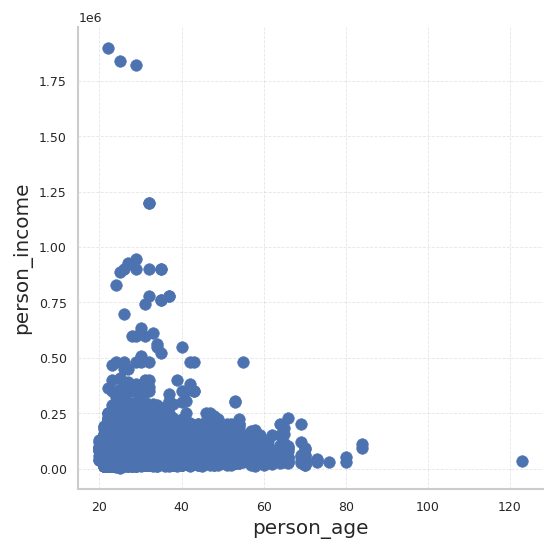

In [12]:
plot_scatter(x="person_age",y="person_income")

In [13]:
df_train["person_emp_length"].describe()

,person_emp_length
count,58645.000000
mean,4.701015
std,3.959784
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,123.000000


In [14]:
df_train[df_train["cb_person_cred_hist_length"]>0.75*df_train["person_age"]]
#np.round(df_train["cb_person_cred_hist_length"].mean(),0).astype(int)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
11996,11996,31,117516,MORTGAGE,3.0,MEDICAL,C,21000,13.49,0.18,N,24,0
21827,21827,28,186480,MORTGAGE,2.0,PERSONAL,A,10000,5.42,0.05,N,29,0


In [15]:
df_train["loat_to_income_diff"] = (df_train["loan_amnt"] / df_train["person_income"]) - df_train["loan_percent_income"]
df_train["loat_to_income_real"] = np.round((df_train["loan_amnt"] / df_train["person_income"]),2)
df_train.head()
print(df_train.shape)
df_train[((df_train["loat_to_income_diff"]<=-0.2)|(df_train["loat_to_income_diff"]>=0.2))]

(58645, 15)


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,loat_to_income_diff,loat_to_income_real
729,729,22,25000,MORTGAGE,7.0,EDUCATION,C,14000,12.84,0.05,Y,2,1,0.510000,0.56
1296,1296,25,15436,MORTGAGE,8.0,MEDICAL,B,7125,9.99,0.04,N,4,1,0.421583,0.46
4455,4455,22,95004,MORTGAGE,0.0,PERSONAL,B,2225,10.95,0.26,N,4,0,-0.236580,0.02
7965,7965,37,21600,RENT,1.0,EDUCATION,E,20000,18.39,0.10,Y,13,1,0.825926,0.93
11432,11432,27,65004,RENT,1.0,VENTURE,B,20000,11.83,0.03,N,8,0,0.277673,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54527,54527,22,25000,MORTGAGE,0.0,EDUCATION,D,15000,13.67,0.06,N,4,0,0.540000,0.60
54855,54855,35,36960,RENT,8.0,PERSONAL,D,18000,14.61,0.04,N,10,0,0.447013,0.49
54980,54980,22,69000,RENT,0.0,VENTURE,D,3775,18.25,0.59,N,4,1,-0.535290,0.05
55372,55372,24,14400,RENT,0.0,VENTURE,D,10000,15.33,0.07,N,4,1,0.624444,0.69


In [16]:
df_train.loc[df_train["loat_to_income_diff"] <= -0.2, "loan_amnt"] = (df_train.loc[df_train["loat_to_income_diff"] <= -0.2, "person_income"]*df_train.loc[df_train["loat_to_income_diff"] <= -0.2, "loan_percent_income"]).values
df_train.loc[df_train["loat_to_income_diff"] >= 0.2, "person_income"] = (df_train.loc[df_train["loat_to_income_diff"] >= 0.2, "loan_amnt"]/df_train.loc[df_train["loat_to_income_diff"] >= 0.2, "loan_percent_income"]).values

In [17]:
df_train["loat_to_income_diff"] = (df_train["loan_amnt"] / df_train["person_income"]) - df_train["loan_percent_income"]
df_train["loat_to_income_real"] = np.round((df_train["loan_amnt"] / df_train["person_income"]),2)
df_train.head()
print(df_train.shape)
df_train[((df_train["loat_to_income_diff"]<=-0.2)|(df_train["loat_to_income_diff"]>=0.2))]

(58645, 15)


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,loat_to_income_diff,loat_to_income_real


In [18]:
df_test["loat_to_income_diff"] = (df_test["loan_amnt"] / df_test["person_income"]) - df_test["loan_percent_income"]
df_test["loat_to_income_real"] = (df_test["loan_amnt"] / df_test["person_income"])

df_test[(df_test["loat_to_income_diff"]<=-0.10)|(df_test["loat_to_income_diff"]>=0.10)]

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loat_to_income_diff,loat_to_income_real
607,59252,36,170004,MORTGAGE,9.0,HOMEIMPROVEMENT,A,5500,7.88,0.29,N,15,-0.257648,0.032352
1480,60125,29,12000,MORTGAGE,8.0,MEDICAL,A,9800,6.76,0.08,N,6,0.736667,0.816667
2148,60793,22,95000,MORTGAGE,1.0,MEDICAL,C,3500,11.54,0.44,Y,4,-0.403158,0.036842
2176,60821,27,110000,MORTGAGE,11.0,MEDICAL,A,3000,7.90,0.25,N,9,-0.222727,0.027273
2545,61190,25,52000,RENT,10.0,MEDICAL,C,3000,14.65,0.53,Y,2,-0.472308,0.057692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37913,96558,29,58650,MORTGAGE,9.0,MEDICAL,D,25000,15.37,0.29,N,8,0.136257,0.426257
37920,96565,22,20004,RENT,1.0,EDUCATION,A,6500,8.59,0.03,N,4,0.294935,0.324935
37929,96574,22,20000,MORTGAGE,4.0,DEBTCONSOLIDATION,B,6000,10.46,0.03,N,4,0.270000,0.300000
38005,96650,27,40000,MORTGAGE,11.0,DEBTCONSOLIDATION,A,35000,7.49,0.09,N,9,0.785000,0.875000


**Descriptions of Loan Data**

Descriptions for the column names based on the data provided:

* **id**: Unique identifier for each record.
* **person_age**: Age of the individual, categorized into ranges.
* **person_income**: Income of the individual, categorized into income ranges.
* **person_home_ownership**: Homeownership status, which includes categories like 'RENT', 'MORTGAGE', etc.
* **person_emp_length**: Employment length of the individual, categorized into ranges based on years.
* **loan_intent**: The purpose of the loan, with categories such as 'EDUCATION', 'MEDICAL', etc.
* **loan_grade**: The credit grade of the loan, such as 'A', 'B', etc.
* **loan_amnt**: Loan amount, categorized into ranges.
* **loan_int_rate**: Loan interest rate, categorized into percentage ranges.
* **loan_percent_income**: Percentage of the individual’s income that the loan represents, categorized into - ranges.
* **cb_person_default_on_file**: Whether the person has a history of loan default, with values 'true' or 'false'.
* **cb_person_cred_hist_length**: Length of the individual’s credit history, categorized into ranges.
* **loan_status**: with values representing whether the loan status approval( binary values)

The dataset is a about loan applications, including personal, financial, and loan details. It's likely used for predicting whether a person will default on a loan, making it a binary classification problem. The goal is to figure out which applicants are at higher risk of not paying back their loans based on their age, income, employment, loan purpose, credit history, and other related information.

In [64]:
class Config:

    state = 42
    n_splits = 10
    early_stop = 200

    target = 'loan_status'
    train = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E10/train.csv')
    test = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E10/test.csv')
    submission = pd.read_csv( "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E10/sample_submission.csv")
    train_org = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E10/credit_risk_dataset.csv")

    original_data = 'Y'
    outliers = 'N'
    log_trf = 'Y'
    scaler_trf = 'Y'
    feature_eng = 'Y'
    missing = 'Y'
    missing_approach = "Complex"
    force_normalization="Y"
    impose_normalization="Y"
    trg_enc = "N"
    log_trans_cols = ["person_age","person_income","loan_amnt","income_per_year_emp","debt_to_credit_hist_ratio","int_per_year_emp",
                      "loan_amt_per_emp_year","loan_int_emp_interaction","loan_amt_credit_hist_age_interaction","age_interaction"]
    force_norm_cols = ["loan_percent_income","interest_to_income","int_to_cred_hist"]
    impose_norm_cols = ["loan_sustainability"]
    trg_enc_feat = ["cb_person_default_on_file"]

In [65]:
class Preprocessing():

    def __init__(self):
        self.train = Config.train
        self.test = Config.test
        self.targets = Config.target

        self.prp_data()

    def prp_data(self):

        if Config.original_data == 'Y':
            self.train = pd.concat([self.train, Config.train_org], ignore_index=True).drop_duplicates(ignore_index=True)

        self.train = self.train.drop(['id'], axis=1)
        self.test = self.test.drop(['id'], axis=1)

        self.cat_features = self.train.drop(self.targets, axis=1).select_dtypes(include=['object', 'bool']).columns.tolist()
        self.num_features = self.train.drop(self.targets, axis=1).select_dtypes(exclude=['object', 'bool']).columns.tolist()

        self.train = self.reduce_mem(self.train)
        self.test = self.reduce_mem(self.test)
        return self

    def reduce_mem(self, df):

        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64', "uint16", "uint32", "uint64"]

        for col in df.columns:
            col_type = df[col].dtypes

            if col_type in numerics:
                c_min = df[col].min()
                c_max = df[col].max()

                if "int" in str(col_type):
                    if c_min >= np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min >= np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min >= np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min >= np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)
                else:
                    if c_min >= np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                        df[col] = df[col].astype(np.float32)
                    if c_min >= np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                        df[col] = df[col].astype(np.float32)
                    else:
                        df[col] = df[col].astype(np.float64)

        return df

In [66]:
class EDA(Config, Preprocessing):

    def __init__(self):
        super().__init__()

        self.data_info()
        self.heatmap()
        self.dist_plots()
        self.cat_feature_plots()
        self.target_pie()

    def data_info(self):

        for data, label in zip([self.train, self.test], ['Train', 'Test']):
            table_style = [{'selector': 'th:not(.index_name)',
                            'props': [('background-color', 'slategrey'),
                                      ('color', '#FFFFFF'),
                                      ('font-weight', 'bold'),
                                      ('border', '1px solid #DCDCDC'),
                                      ('text-align', 'center')]
                            },
                            {'selector': 'tbody td',
                             'props': [('border', '1px solid #DCDCDC'),
                                       ('font-weight', 'normal')]
                            }]
            print(Style.BRIGHT+Fore.RED+f'\n{label} head\n')
            display(data.head().style.set_table_styles(table_style))

            print(Style.BRIGHT+Fore.RED+f'\n{label} info\n'+Style.RESET_ALL)
            display(data.info())

            print(Style.BRIGHT+Fore.RED+f'\n{label} describe\n')
            display(data.describe().drop(index='count', columns=self.targets, errors = 'ignore').T
                    .style.set_table_styles(table_style).format('{:.3f}'))

            print(Style.BRIGHT+Fore.RED+f'\n{label} missing values\n'+Style.RESET_ALL)
            display(data.isna().sum())
        return self

    def heatmap(self):
        print(Style.BRIGHT+Fore.RED+f'\nCorrelation Heatmap\n')
        plt.figure(figsize=(7,7))
        corr = self.train.select_dtypes(exclude='object').corr(method='pearson')
        sns.heatmap(corr, fmt = '0.2f', cmap = 'Blues', annot=True, cbar=False)
        plt.show()

    def dist_plots(self):

        print(Style.BRIGHT+Fore.RED+f"\nDistribution analysis - Numerical\n")
        df = pd.concat([self.train[self.num_features].assign(Source = 'Train'),
                        self.test[self.num_features].assign(Source = 'Test'),],
                        axis=0, ignore_index = True)

        fig, axes = plt.subplots(len(self.num_features), 2 ,figsize = (18, len(self.num_features) * 6),
                                 gridspec_kw = {'hspace': 0.3,
                                                'wspace': 0.2,
                                                'width_ratios': [0.70, 0.30]
                                               }
                                )
        for i,col in enumerate(self.num_features):
            ax = axes[i,0]
            sns.kdeplot(data = df[[col, 'Source']], x = col, hue = 'Source',
                        palette = ['royalblue', 'tomato'], ax = ax, alpha=0.7, linewidth = 2
                       )
            ax.set(xlabel = '', ylabel = '')
            ax.set_title(f"\n{col}")
            ax.grid('--',alpha=0.7)

            ax = axes[i,1]
            sns.boxplot(data = df, y = col, x=df.Source, width = 0.5,
                        linewidth = 1, fliersize= 1,
                        ax = ax, palette=['royalblue', 'tomato']
                       )
            ax.set_title(f"\n{col}")
            ax.set(xlabel = '', ylabel = '')
            ax.tick_params(axis='both', which='major')
            ax.set_xticklabels(['Train', 'Test'])

        plt.tight_layout()
        plt.show()

    def cat_feature_plots(self):
        print(Style.BRIGHT+Fore.RED+f"\nDistribution analysis - Categorical\n")
        fig, axes = plt.subplots(len(self.cat_features), 2 ,figsize = (18, len(self.cat_features) * 6),
                                 gridspec_kw = {'hspace': 0.5,
                                                'wspace': 0.2,
                                               }
                                )

        for i, col in enumerate(self.cat_features):

            ax = axes[i,0]
            sns.barplot(data=self.train[col].value_counts().nlargest(10).reset_index(), x=col, y='count', ax=ax, color='royalblue', alpha=0.7)
            ax.set(xlabel = '', ylabel = '')
            ax.set_title(f"\n{col} Train")

            ax = axes[i,1]
            sns.barplot(data=self.test[col].value_counts().nlargest(10).reset_index(), x=col, y='count', ax=ax, color='tomato', alpha=0.7)
            ax.set(xlabel = '', ylabel = '')
            ax.set_title(f"\n{col} Test")

        plt.tight_layout()
        plt.show()

    def target_pie(self):
        print(Style.BRIGHT+Fore.RED+f"\nTarget feature distribution\n")
        targets = self.train[self.targets]
        plt.figure(figsize=(6, 6))
        plt.pie(targets.value_counts(), labels=targets.value_counts().index, autopct='%1.2f%%', colors=palette_9)
        plt.show()

## 1.0 EDA


Train head



,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.000000,EDUCATION,B,6000,11.490000,0.170000,N,14,0
1,22,56000,OWN,6.000000,MEDICAL,C,4000,13.350000,0.070000,N,2,0
2,29,28800,OWN,8.000000,PERSONAL,A,6000,8.900000,0.210000,N,10,0
3,30,70000,RENT,14.000000,VENTURE,B,12000,11.110000,0.170000,N,5,0
4,22,60000,RENT,2.000000,MEDICAL,A,6000,6.920000,0.100000,N,3,0



Train info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91061 entries, 0 to 91060
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  91061 non-null  int32  
 1   person_income               91061 non-null  int32  
 2   person_home_ownership       91061 non-null  object 
 3   person_emp_length           90174 non-null  float32
 4   loan_intent                 91061 non-null  object 
 5   loan_grade                  91061 non-null  object 
 6   loan_amnt                   91061 non-null  int32  
 7   loan_int_rate               87966 non-null  float32
 8   loan_percent_income         91061 non-null  float32
 9   cb_person_default_on_file   91061 non-null  object 
 10  cb_person_cred_hist_length  91061 non-null  int32  
 11  loan_status                 91061 non-null  int32  
dtypes: float32(3), int32(5), object(4)
memory usage: 5.6+ MB


None


Train describe



,mean,std,min,25%,50%,75%,max
person_age,27.621,6.150,20.000,23.000,26.000,30.000,144.000
person_income,64774.321,47922.855,4000.000,40000.000,57000.000,78000.000,6000000.000
person_emp_length,4.732,4.026,0.000,2.000,4.000,7.000,123.000
loan_amnt,9351.508,5848.017,500.000,5000.000,8000.000,12000.000,35000.000
loan_int_rate,10.791,3.109,5.420,7.880,10.950,13.110,23.220
loan_percent_income,0.163,0.097,0.000,0.090,0.140,0.220,0.830
cb_person_cred_hist_length,5.813,4.040,2.000,3.000,4.000,8.000,30.000



Train missing values



,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,887
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3095
loan_percent_income,0
cb_person_default_on_file,0



Test head



,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,69000,RENT,3.000000,HOMEIMPROVEMENT,F,25000,15.760000,0.360000,N,2
1,26,96000,MORTGAGE,6.000000,PERSONAL,C,10000,12.680000,0.100000,Y,4
2,26,30000,RENT,5.000000,VENTURE,E,4000,17.190001,0.130000,Y,2
3,33,50000,RENT,4.000000,DEBTCONSOLIDATION,A,7000,8.900000,0.140000,N,7
4,26,102000,MORTGAGE,8.000000,HOMEIMPROVEMENT,D,15000,16.320000,0.150000,Y,4



Test info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  39098 non-null  int32  
 1   person_income               39098 non-null  int32  
 2   person_home_ownership       39098 non-null  object 
 3   person_emp_length           39098 non-null  float32
 4   loan_intent                 39098 non-null  object 
 5   loan_grade                  39098 non-null  object 
 6   loan_amnt                   39098 non-null  int32  
 7   loan_int_rate               39098 non-null  float32
 8   loan_percent_income         39098 non-null  float32
 9   cb_person_default_on_file   39098 non-null  object 
 10  cb_person_cred_hist_length  39098 non-null  int32  
dtypes: float32(3), int32(4), object(4)
memory usage: 2.2+ MB


None


Test describe



,mean,std,min,25%,50%,75%,max
person_age,27.567,6.033,20.000,23.000,26.000,30.000,94.000
person_income,64060.461,37955.829,4000.000,42000.000,58000.000,75885.000,1900000.000
person_emp_length,4.687,3.868,0.000,2.000,4.000,7.000,42.000
loan_amnt,9251.466,5576.255,700.000,5000.000,8000.000,12000.000,35000.000
loan_int_rate,10.661,3.020,5.420,7.880,10.750,12.990,22.110
loan_percent_income,0.160,0.092,0.000,0.090,0.140,0.210,0.730
cb_person_cred_hist_length,5.831,4.072,2.000,3.000,4.000,8.000,30.000



Test missing values



,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0
cb_person_default_on_file,0



Correlation Heatmap



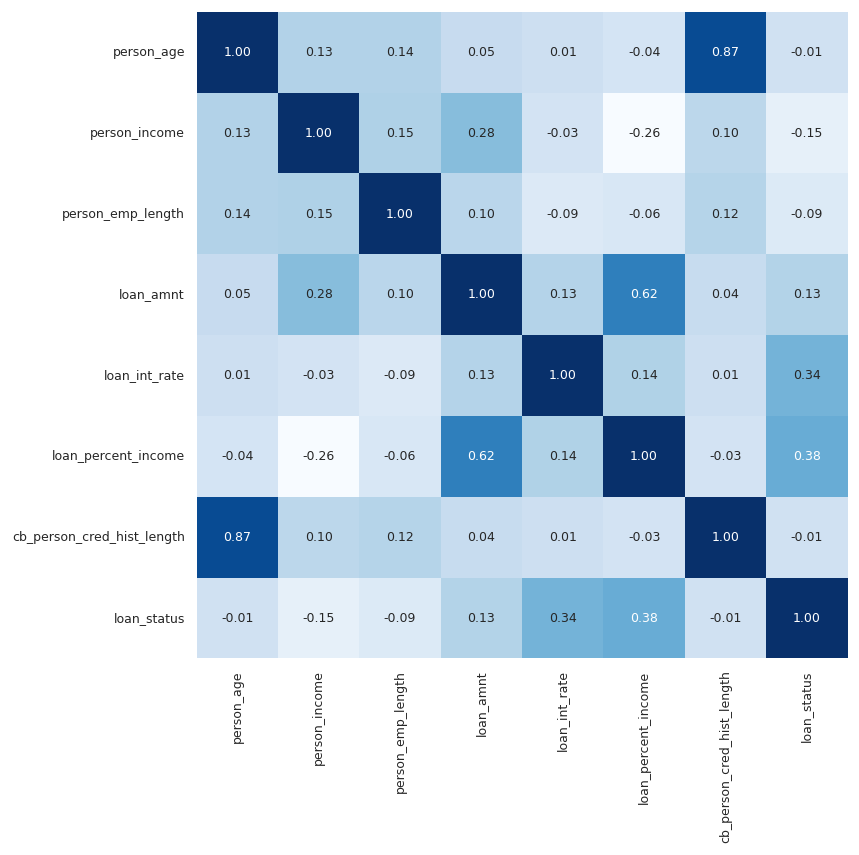


Distribution analysis - Numerical



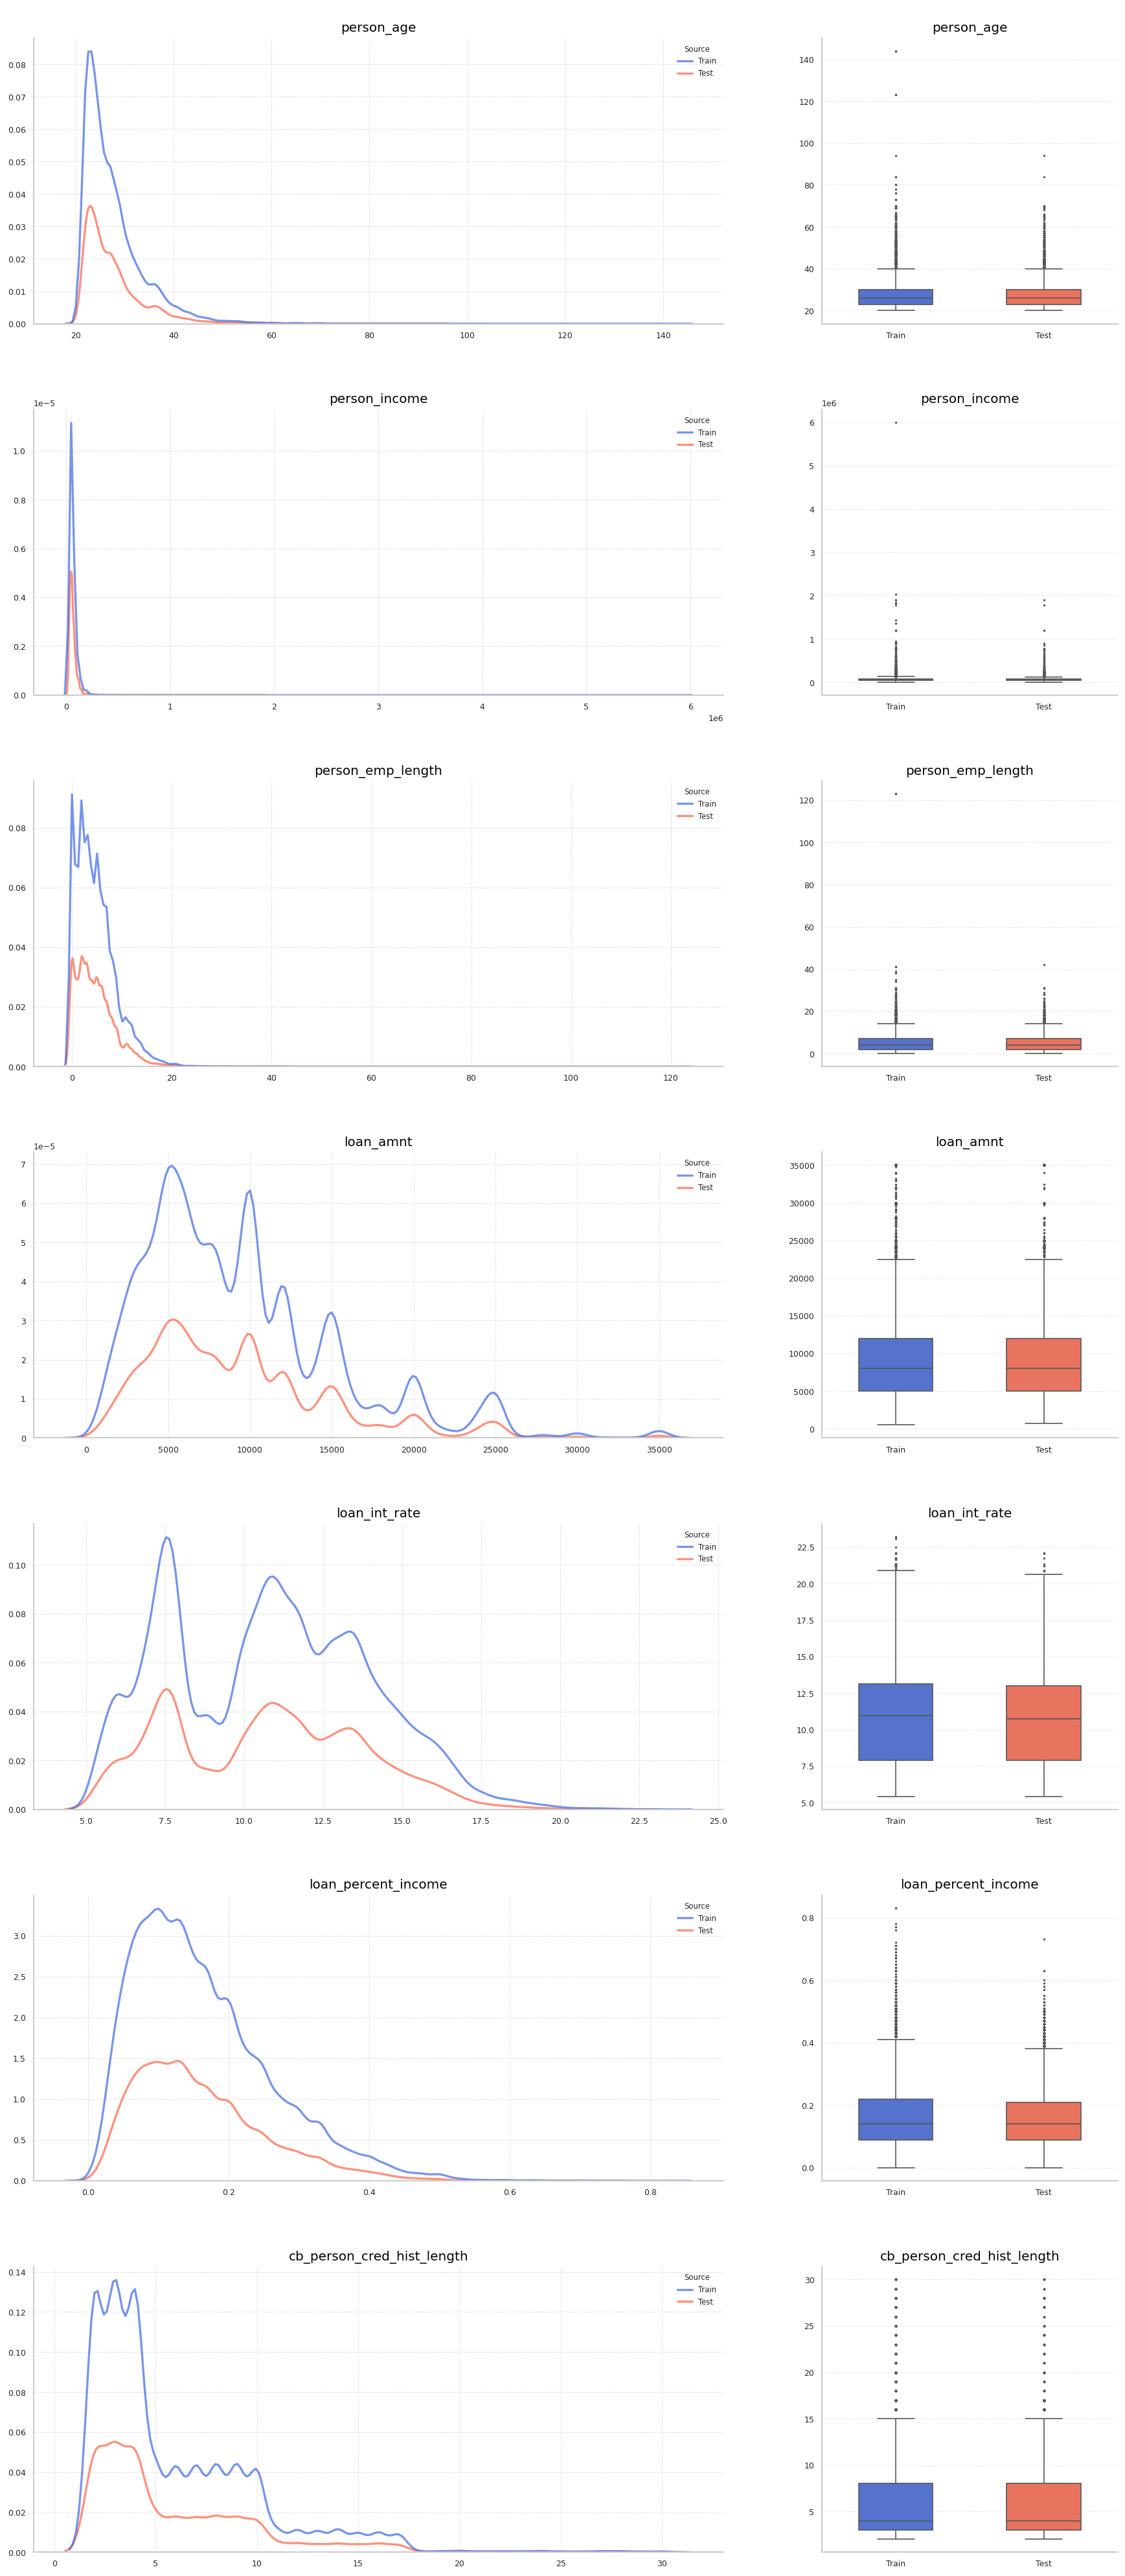


Distribution analysis - Categorical



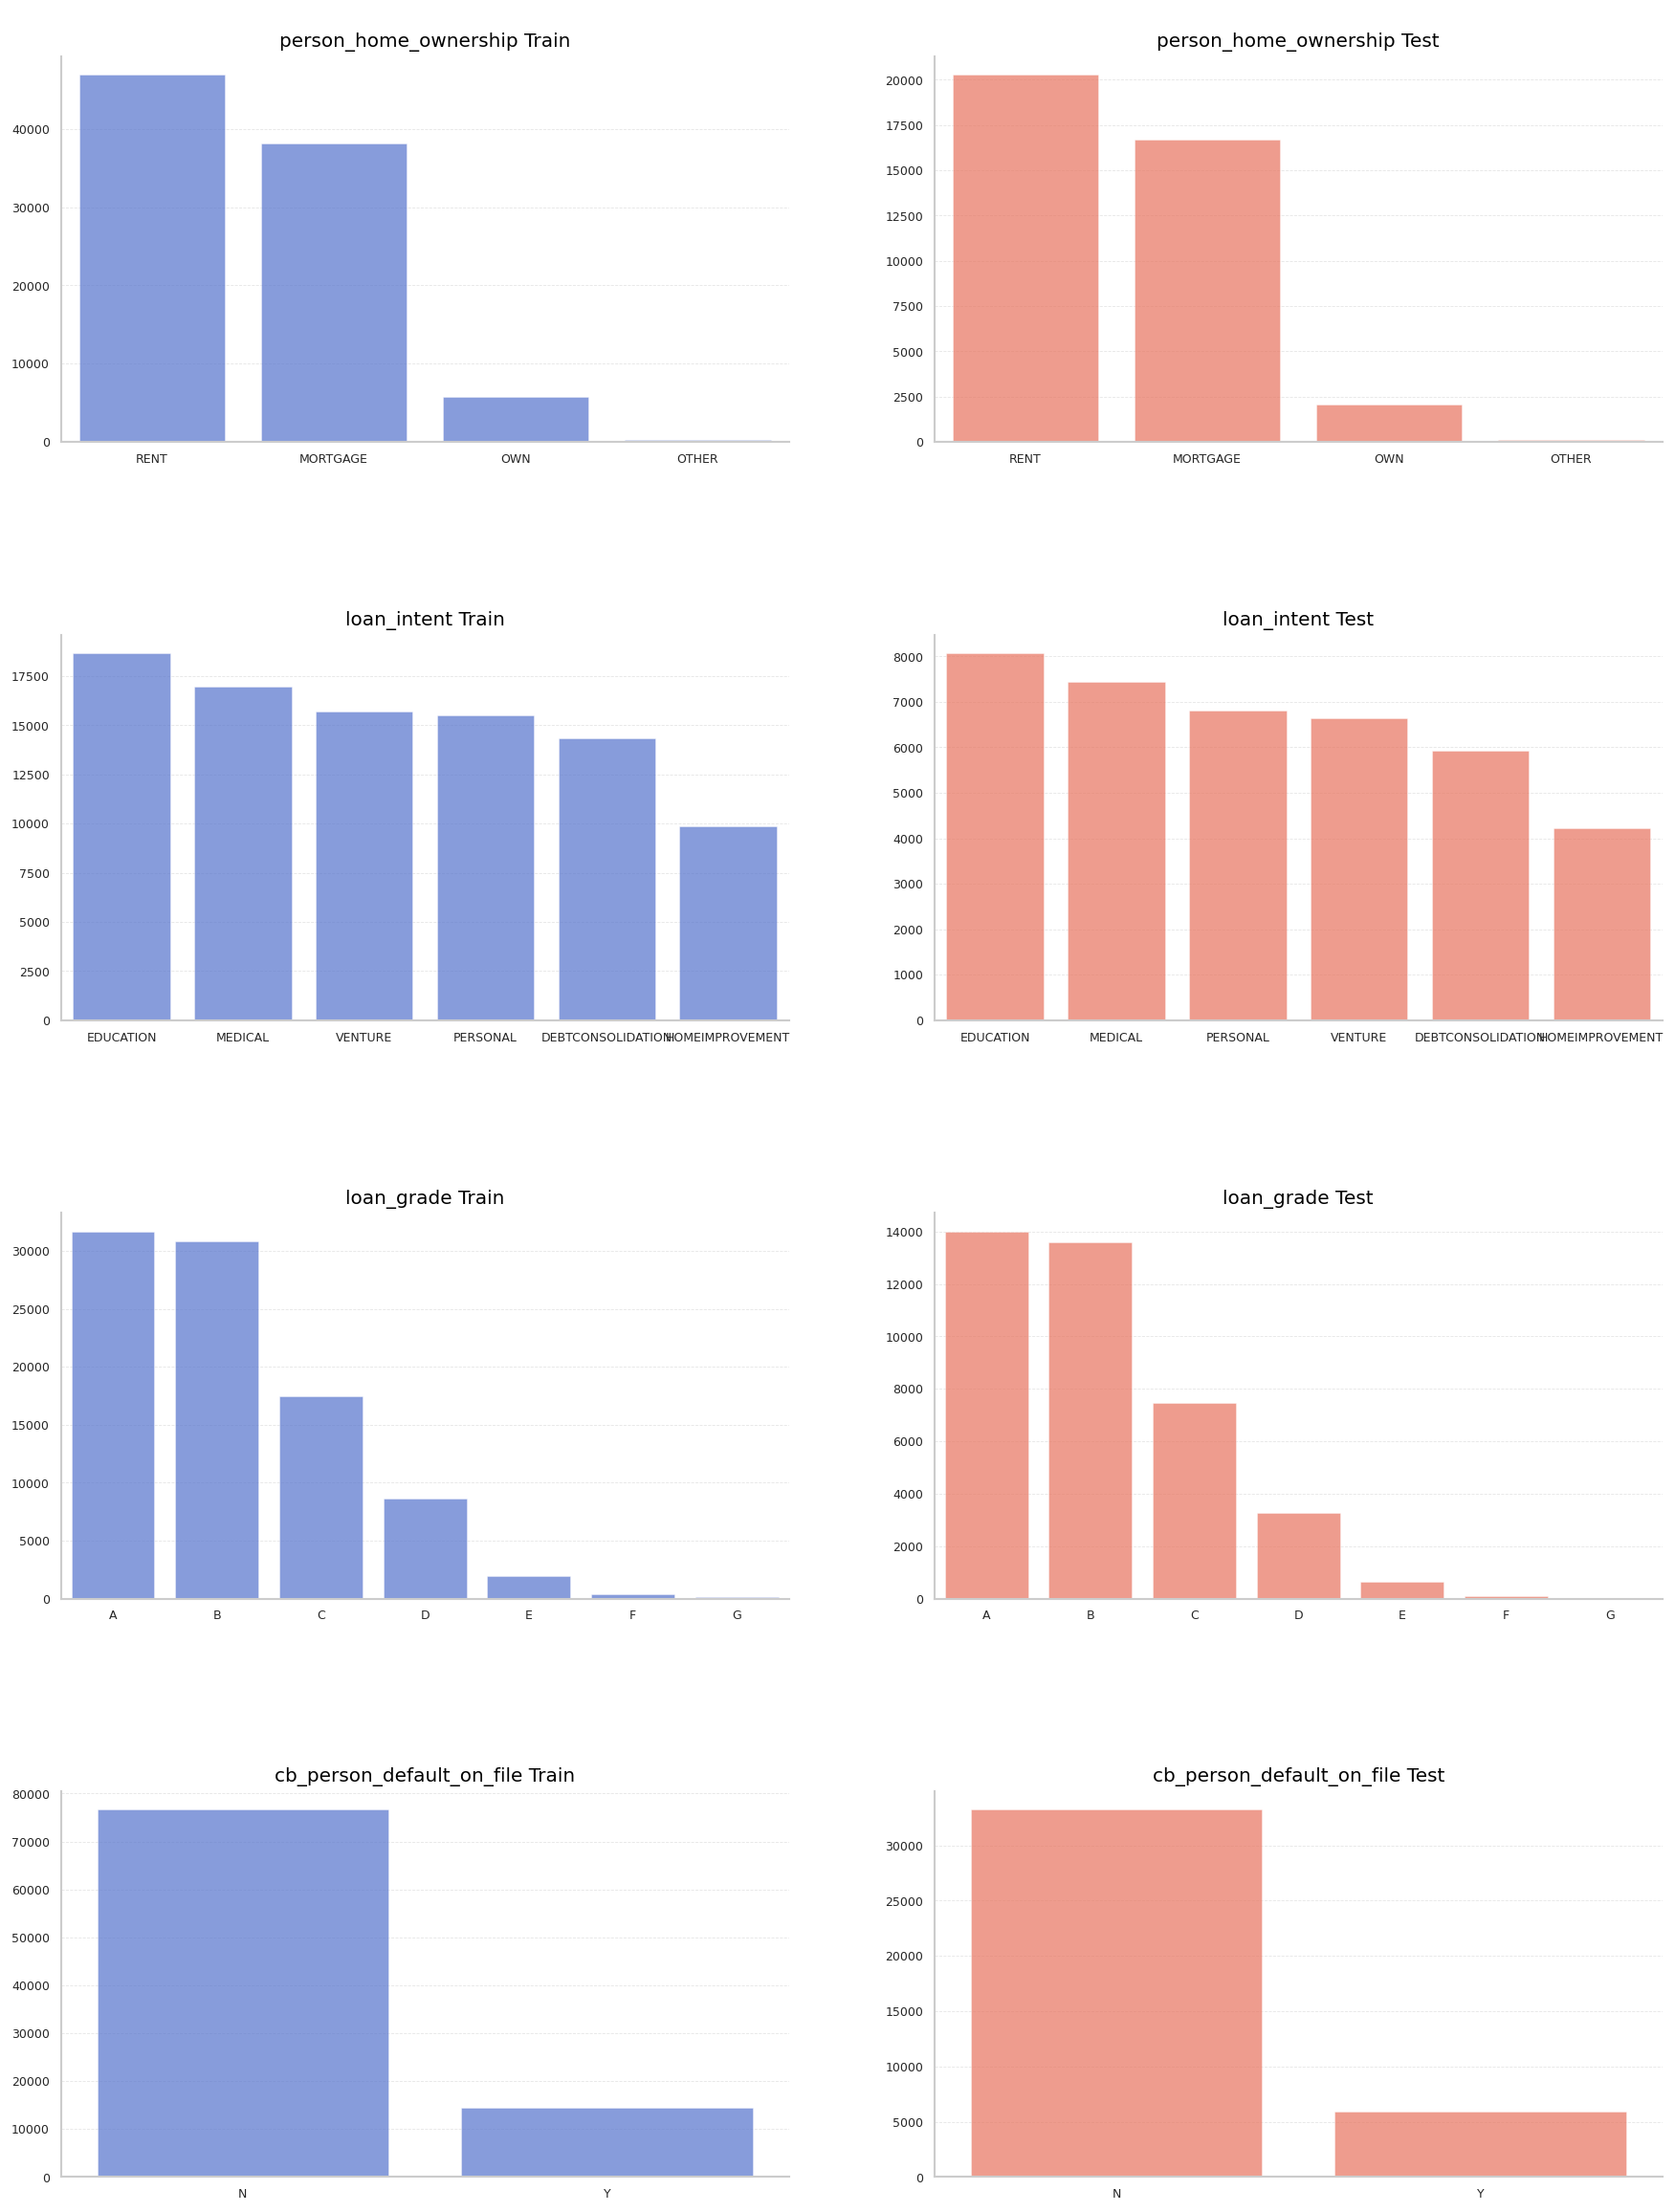


Target feature distribution



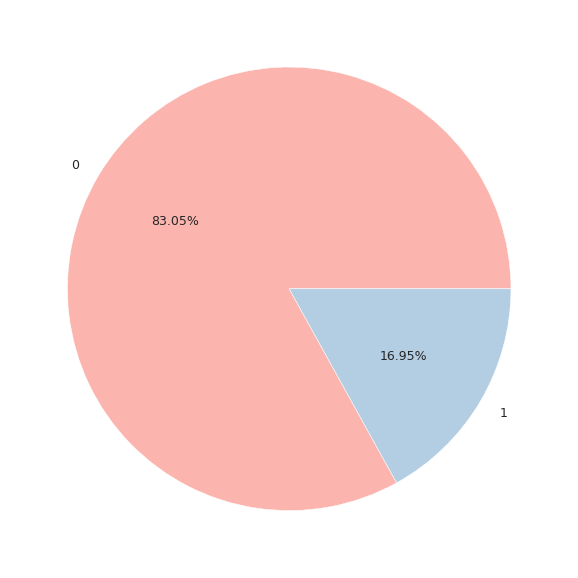

In [67]:
eda = EDA()

## 2.0 Data Transformation and Feature Negeneering:

In [75]:
1/8

0.125

In [76]:
class Transform(Config, Preprocessing):

    def __init__(self):
        super().__init__()

        if self.missing == 'Y':
          if self.missing_approach != "Complex":
            pass
          else:
            self.missing_values()

        self.train_raw = self.train.copy()

        if self.feature_eng == 'Y':
            self.train = self.new_features(self.train)
            self.test = self.new_features(self.test)
            self.train_raw = self.new_features(self.train_raw)

        self.num_features = self.train.drop(self.target, axis=1).select_dtypes(exclude=['object', 'bool']).columns.tolist()
        self.cat_features = self.train.drop(self.target, axis=1).select_dtypes(include=['object', 'bool']).columns.tolist()

        if self.outliers == 'Y':
            self.remove_outliers()

        if self.log_trf == 'Y':
            self.log_transformation()

        if self.force_normalization == 'Y':
            self.forced_norm_transformation()

        if self.impose_normalization == 'Y':
            self.impose_normalization_transformation()

        if self.trg_enc == 'Y':
            self.target_encoding()

        if self.scaler_trf == 'Y':
            self.scaler()

        if self.outliers == 'Y' or self.log_trf == 'Y' or self.scaler_trf =='Y':
            self.distribution()

    def __call__(self):

        self.train[self.cat_features] = self.train[self.cat_features].astype('category')
        self.test[self.cat_features] = self.test[self.cat_features].astype('category')
        data = pd.concat([self.test, self.train])
        self.train_enc, self.test_enc = self.encode(data)

#        if self.missing_approach == "Complex":
#          self.impute_mixed_data()

        self.cat_features_card = []
        for f in self.cat_features:
            self.cat_features_card.append(1 + data[f].max())

        self.y = self.train[self.target]
        self.train = self.train.drop(self.target, axis=1)
        self.train_enc = self.train_enc.drop(self.target, axis=1)

        scaler = StandardScaler()
        self.train_enc[self.num_features] = scaler.fit_transform(self.train_enc[self.num_features])
        self.test_enc[self.num_features] = scaler.transform(self.test_enc[self.num_features])

        return self.train, self.train_enc, self.y, self.test, self.test_enc, self.cat_features

    def encode(self, data):

        oe = OrdinalEncoder()
        data[self.cat_features] = oe.fit_transform(data[self.cat_features]).astype('int')

        train_enc = data[~data[self.target].isna()]
        test_enc = data[data[self.target].isna()].drop(self.target, axis=1)
        return train_enc, test_enc

    def new_features(self, df):
        #Replace Some entries that appears wrong in the dataset:
        df['loan_to_income'] = np.round((df["loan_amnt"] / df["person_income"]),2) - df['loan_percent_income']
        df.loc[df["loan_to_income"] <= -0.15, "loan_amnt"] = (df.loc[df["loan_to_income"] <= -0.15, "person_income"]*df.loc[df["loan_to_income"] <= -0.15, "loan_percent_income"]).values
        df.loc[df["loan_to_income"] >= 0.15, "person_income"] = (df.loc[df["loan_to_income"] >= 0.15, "loan_amnt"]/df.loc[df["loan_to_income"] >= 0.15, "loan_percent_income"]).values
        #df['loan_to_income'] = np.round((df["loan_amnt"] / df["person_income"]),2) - df['loan_percent_income']
        df=df.drop(columns=['loan_to_income'])

        df.loc[df["cb_person_cred_hist_length"]>0.75*df["person_age"],"cb_person_cred_hist_length"] = np.round(df["cb_person_cred_hist_length"].mean(),0).astype(int)

        # New Fearures
        df['interest_to_income'] = df['loan_amnt'] * df['loan_int_rate'] / (df['person_income'])

        df['income_per_year_emp'] = df['person_income'] / (df['person_emp_length']+1.0)
        df['cred_hist_to_age_ratio'] = df['cb_person_cred_hist_length'] / df['person_age']
        # df['int_to_loan_ratio'] = df['loan_int_rate'] / df['loan_amnt']
        df['debt_to_credit_hist_ratio'] = df['loan_amnt'] / df['cb_person_cred_hist_length']
        df['int_to_cred_hist'] = df['loan_int_rate'] / df['cb_person_cred_hist_length']
        df['int_per_year_emp'] = df['loan_int_rate'] / (df['person_emp_length']+1)
        df['loan_amt_per_emp_year'] = df['loan_amnt'] / (df['person_emp_length']+1)
        df['loan_int_emp_interaction'] = df['loan_int_rate'] * (df['person_emp_length']+1)
        df['loan_amt_credit_hist_age_interaction'] = df['loan_amnt'] * df['cb_person_cred_hist_length'] / df['person_age']
        df['age_interaction'] = (df['person_emp_length'] + df['cb_person_cred_hist_length']) / df['person_age']
        df['loan_sustainability'] = (0.01*df['interest_to_income'] + 0.125*df['loan_percent_income'])*(df["loan_grade"].replace({"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7}))

        df = df[df['person_age']<100]
        df = df[df['person_income']<=1900000]
        df = df[df['person_emp_length']<50]
        df.reset_index(drop=True, inplace=True)

        return df

    def log_transformation(self):


        self.train[self.log_trans_cols] = np.log1p(self.train[self.log_trans_cols])
        self.test[self.log_trans_cols] = np.log1p(self.test[self.log_trans_cols])

        return self

    def forced_norm_transformation(self):

        self.train[self.force_norm_cols] = np.sqrt(self.train[self.force_norm_cols]+0.1)
        self.test[self.force_norm_cols] = np.sqrt(self.test[self.force_norm_cols]+0.1)

        return self

    def impose_normalization_transformation(self):

        scaler = QuantileTransformer(output_distribution='normal',subsample=20_000,random_state=42)
        self.train[self.impose_norm_cols] = scaler.fit_transform(self.train[self.impose_norm_cols])
        self.test[self.impose_norm_cols] = scaler.transform(self.test[self.impose_norm_cols])

        return self


    def distribution(self):

        print(Style.BRIGHT+Fore.RED+f'\nHistograms of distribution\n')
        fig, axes = plt.subplots(nrows=len(self.num_features), ncols=2, figsize=(15, len(self.num_features)*5))

        for (ax_r, ax_n), col in zip(axes, self.num_features):

            ax_r.set_title(f'{col} ($\mu=$ {self.train_raw[col].mean():.2f} and $\sigma=$ {self.train_raw[col].std():.2f} )')
            ax_r.hist(self.train_raw[col], bins=30, color='tomato',alpha=0.7)
            ax_r.axvline(self.train_raw[col].mean(), color='r', label='Mean')
            ax_r.axvline(self.train_raw[col].median(), color='y', linestyle='--', label='Median')
            ax_r.legend()

            ax_n.set_title(f'{col} Normalized ($\mu=$ {self.train[col].mean():.2f} and $\sigma=$ {self.train[col].std():.2f} )')
            ax_n.hist(self.train[col], bins=30, color='royalblue',alpha=0.7)
            ax_n.axvline(self.train[col].mean(), color='r', label='Mean')
            ax_n.axvline(self.train[col].median(), color='y', linestyle='--', label='Median')
            ax_n.legend()

    def remove_outliers(self):
        Q1 = self.train[self.targets].quantile(0.25)
        Q3 = self.train[self.targets].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5*IQR
        upper_limit = Q3 + 1.5*IQR
        self.train = self.train[(self.train[self.targets] >= lower_limit) & (self.train[self.targets] <= upper_limit)]
        self.train.reset_index(drop=True, inplace=True)

    def scaler(self):
        scaler = StandardScaler()
        self.train[self.num_features] = scaler.fit_transform(self.train[self.num_features])
        self.test[self.num_features] = scaler.transform(self.test[self.num_features])
        return self

    def missing_values(self):

        self.train[self.num_features] = self.train[self.num_features].fillna(self.train[self.num_features].median())
        self.test[self.num_features] = self.test[self.num_features].fillna(self.test[self.num_features].median())
        for column in self.cat_features:
            self.train[column] = self.train[column].fillna(self.train[column].mode()[0])
            self.test[column] = self.test[column].fillna(self.test[column].mode()[0])
        return self


    def impute_mixed_data(self):
        """
        Imputes missing values in a mixed-data DataFrame using separate
        IterativeImputers for numerical and categorical features.

        Args:
          df: Pandas DataFrame with missing values.
          num_features: List of column names of numerical features.
          cat_features: List of column names of categorical features.

        Returns:
          df_imputed: Pandas DataFrame with imputed values.
        """

        # Create copies of the DataFrame for imputation
        df_num_train = self.train[self.num_features].copy()
        df_cat_train = self.train[self.cat_features].copy()
        df_num_test = self.test[self.num_features].copy()
        df_cat_test = self.test[self.cat_features].copy()

        # Initialize IterativeImputer for numerical features with a regressor
        num_imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=42)

        # Initialize IterativeImputer for categorical features with a classifier
        cat_imputer = IterativeImputer(estimator=RandomForestClassifier(),
                                      initial_strategy='most_frequent',
                                      random_state=42)

        # Impute missing values
        df_num_imputed_train = pd.DataFrame(num_imputer.fit_transform(df_num_train), columns=self.num_features)
        df_cat_imputed_train = pd.DataFrame(cat_imputer.fit_transform(df_cat_train), columns=self.cat_features)
        df_num_imputed_test = pd.DataFrame(num_imputer.transform(df_num_test), columns=self.num_features)
        df_cat_imputed_test = pd.DataFrame(cat_imputer.transform(df_cat_test), columns=self.cat_features)

        # Convert categorical features back to their original datatype
        for feature in cat_features:
            df_cat_imputed_train[feature] = df_cat_imputed_train[feature].astype(self.train[feature].dtype)
            df_cat_imputed_test[feature] = df_cat_imputed_test[feature].astype(self.test[feature].dtype)

        # Concatenate the imputed DataFrames
        df_imputed_train = pd.concat([df_num_imputed_train, df_cat_imputed_train], axis=1)
        df_imputed_test = pd.concat([df_num_imputed_test, df_cat_imputed_test], axis=1)

        # Replace the original DataFrame with the imputed one
        df_imputed_train = df_imputed_train[self.train.columns]
        df_imputed_test = df_imputed_test[self.test.columns]

        self.train = df_imputed_train.copy()
        self.test = df_imputed_test.copy()

        return self

    def target_encoding(self):
        te = TargetEncoder()
        self.train[self.trg_enc_feat] = te.fit_transform(self.train[self.trg_enc_feat],self.train[self.target])
        self.test[self.trg_enc_feat] = te.transform(self.test[self.trg_enc_feat])

        for a in self.cat_features:
            self.cat_features.remove(a)

        return self

    @property
    def cat_features(self):
        return self._cat_features

    @cat_features.setter
    def cat_features(self, cat_features):
        self._cat_features = cat_features

    @property
    def num_features(self):
        return self._num_features

    @num_features.setter
    def num_features(self, num_features):
        self._num_features = num_features

    @property
    def cat_features_card(self):
        return self._cat_features_card

    @cat_features_card.setter
    def cat_features_card(self, cat_features_card):
        self._cat_features_card = cat_features_card

    @property
    def train(self):
        return self._train

    @train.setter
    def train(self, train):
        self._train = train


Histograms of distribution



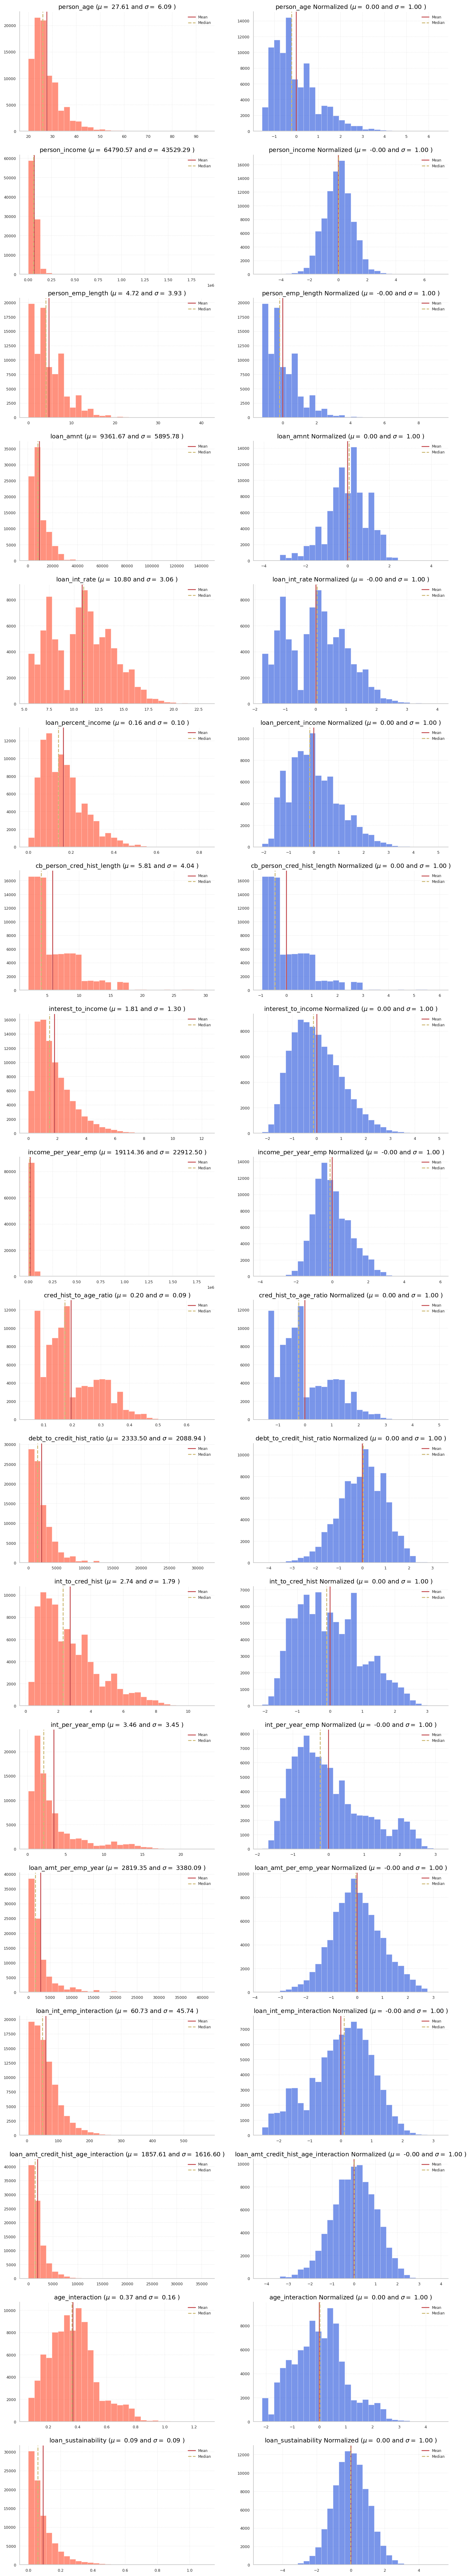

In [77]:
t = Transform()
X, X_enc, y, test, test_enc, cat_features = t()

In [26]:
t.cat_features, t.cat_features_card, t.train.shape

(['person_home_ownership',
  'loan_intent',
  'loan_grade',
  'cb_person_default_on_file'],
 [4, 6, 7, 2],
 (91050, 22))

In [27]:
X.shape, X_enc.shape, test.shape, test_enc.shape

((91050, 22), (91050, 22), (39098, 22), (39098, 22))

## 3.0 Advanced Feature Engeneering

In [28]:
X_enc.sample(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,interest_to_income,income_per_year_emp,cred_hist_to_age_ratio,debt_to_credit_hist_ratio,int_to_cred_hist,int_per_year_emp,loan_amt_per_emp_year,loan_int_emp_interaction,loan_amt_credit_hist_age_interaction,age_interaction,loan_sustainability
6771,-0.408448,1.501085,0,1.089201,3,3,2.277122,1.578362,1.134228,1,-0.696412,1.923876,-0.087334,-0.806530,2.198294,1.359967,-0.556374,0.717073,1.546528,1.366782,0.737526,1.836205
47815,1.019248,0.189530,2,3.125065,5,1,1.008382,0.112476,0.858179,0,0.541775,0.811449,-1.575788,0.493431,0.163861,-0.742838,-1.305894,-0.754358,1.864261,1.194671,2.239359,0.618594
59079,-0.408448,1.032532,3,1.089201,5,0,1.712158,-1.392675,0.951501,0,-0.448775,0.034426,-0.367390,-0.381790,1.458183,-0.557201,-1.270860,0.330111,0.444022,1.259750,0.970527,-0.192566


In [29]:
X_enc_y = pd.concat([X_enc, y], axis=1)
X_enc_y.sample(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,interest_to_income,income_per_year_emp,cred_hist_to_age_ratio,debt_to_credit_hist_ratio,int_to_cred_hist,int_per_year_emp,loan_amt_per_emp_year,loan_int_emp_interaction,loan_amt_credit_hist_age_interaction,age_interaction,loan_sustainability,loan_status
73463,-1.545085,1.428433,0,-0.183214,0,1,0.344035,-0.018407,-0.883020,0,-0.696412,-0.706626,0.700210,-0.487975,0.761520,0.611141,-0.220058,0.103944,0.196056,0.091590,-0.065732,-0.412312,0
4828,1.323444,0.778539,0,-0.692180,0,0,-0.363579,-1.081829,-1.014061,0,0.046500,-1.156387,0.924153,-0.260436,-0.535340,-0.860426,-0.048547,0.143138,-0.886389,-0.313163,-0.889217,-1.419760,0
74234,-0.834433,0.785715,3,-1.201146,3,2,1.008382,0.177917,0.266803,0,-0.696412,0.338058,2.245549,-0.695728,1.255274,0.711116,2.010433,2.209944,-1.708805,0.454467,-1.616571,0.747659,0


In [30]:
X_enc_y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91050 entries, 0 to 91049
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   person_age                            91050 non-null  float64
 1   person_income                         91050 non-null  float64
 2   person_home_ownership                 91050 non-null  int64  
 3   person_emp_length                     91050 non-null  float64
 4   loan_intent                           91050 non-null  int64  
 5   loan_grade                            91050 non-null  int64  
 6   loan_amnt                             91050 non-null  float64
 7   loan_int_rate                         91050 non-null  float64
 8   loan_percent_income                   91050 non-null  float64
 9   cb_person_default_on_file             91050 non-null  int64  
 10  cb_person_cred_hist_length            91050 non-null  float64
 11  interest_to_income  

In [31]:
class plot_class():

    def __init__(self,df, target_variable, features_cat,features_num):
      self.df = df
      self.target_variable = target_variable
      self.features_cat = features_cat
      self.features_num = features_num

    @classmethod
    def plot_categorical_features(cls, df, target_variable, features_cat, features_num):
        """
        Plots the frequency of the target variable for each value of multiple categorical features.

        Args:
          df: Pandas DataFrame containing the data.
          target_variable: Name of the target variable column in the DataFrame.
          features: List of names of the categorical feature columns to plot.
        """

        num_features = len(features_cat)
        num_rows = (num_features + 1) // 2  # Calculate the number of rows needed

        fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))
        axes = axes.flatten()  # Flatten the axes array for easier iteration

        for i, feature in enumerate(features_cat):
            cross_tab = pd.crosstab(df[feature], df[target_variable])
            cross_tab.plot(kind='bar', stacked=False, position=0.3, width=0.4, ax=axes[i],colormap=palette_1, alpha=0.6)
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel('Frequency')
            axes[i].set_title(f'Frequency of {target_variable} by {feature}')

        # Hide any unused subplots
        for i in range(num_features, len(axes)):
            axes[i].axis('off')

        plt.tight_layout()
        plt.show()

        return cls(df, target_variable, features_cat, features_num)

    @classmethod
    def plot_numerical_features(cls, df, target_variable, features_cat, features_num):
        """
        Generates violin plots for numerical features, showing the distribution for each target class.

        Args:
          df: Pandas DataFrame containing the data.
          target_variable: Name of the target variable column in the DataFrame.
          features: List of names of the numerical feature columns to plot.
        """

        num_features = len(features_num)
        num_rows = (num_features + 1) // 2  # Calculate the number of rows needed

        fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))
        axes = axes.flatten()  # Flatten the axes array for easier iteration

        for i, feature in enumerate(features_num):
            sns.violinplot(x=target_variable, y=feature, data=df, ax=axes[i],
                           hue=target_variable,  # Use 'hue' to color by target class
                           palette=palette_9)
            axes[i].set_xlabel(target_variable)
            axes[i].set_ylabel(feature)
            axes[i].set_title(f'Distribution of {feature} by {target_variable}')

        # Hide any unused subplots
        for i in range(num_features, len(axes)):
            axes[i].axis('off')

        plt.tight_layout()
        plt.show()

        return cls(df, target_variable, features_cat, features_num)

    def scatter_comp(self, feat_01, feat_02, hue_def):
        """
        Generates a scatter plot between two features, colored by a third
        categorical feature using Seaborn.

        Args:
          df: Pandas DataFrame containing the data.
          x_feature: Name of the feature to plot on the x-axis.
          y_feature: Name of the feature to plot on the y-axis.
          color_feature: Name of the categorical feature to use for coloring.
        """
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.scatterplot(
            x=feat_01,
            y=feat_02,
            hue=hue_def,  # Use 'hue' for color encoding
            data=self.df,
            ax=ax
        )

        plt.xlabel(feat_01)
        plt.ylabel(feat_02)
        plt.title(f'ScatterPlot of {feat_01} vs. {feat_02} colored by {hue_def}')
        plt.show()

    def heatmap_corr(self):
        print(Style.BRIGHT+Fore.RED+f'\nCorrelation Heatmap\n')
        plt.figure(figsize=(7,7))
        corr = self.df.select_dtypes(exclude='int').corr(method='pearson')
        sns.heatmap(corr, fmt = '0.2f', cmap = "Reds", annot=True, cbar=False)
        plt.show()

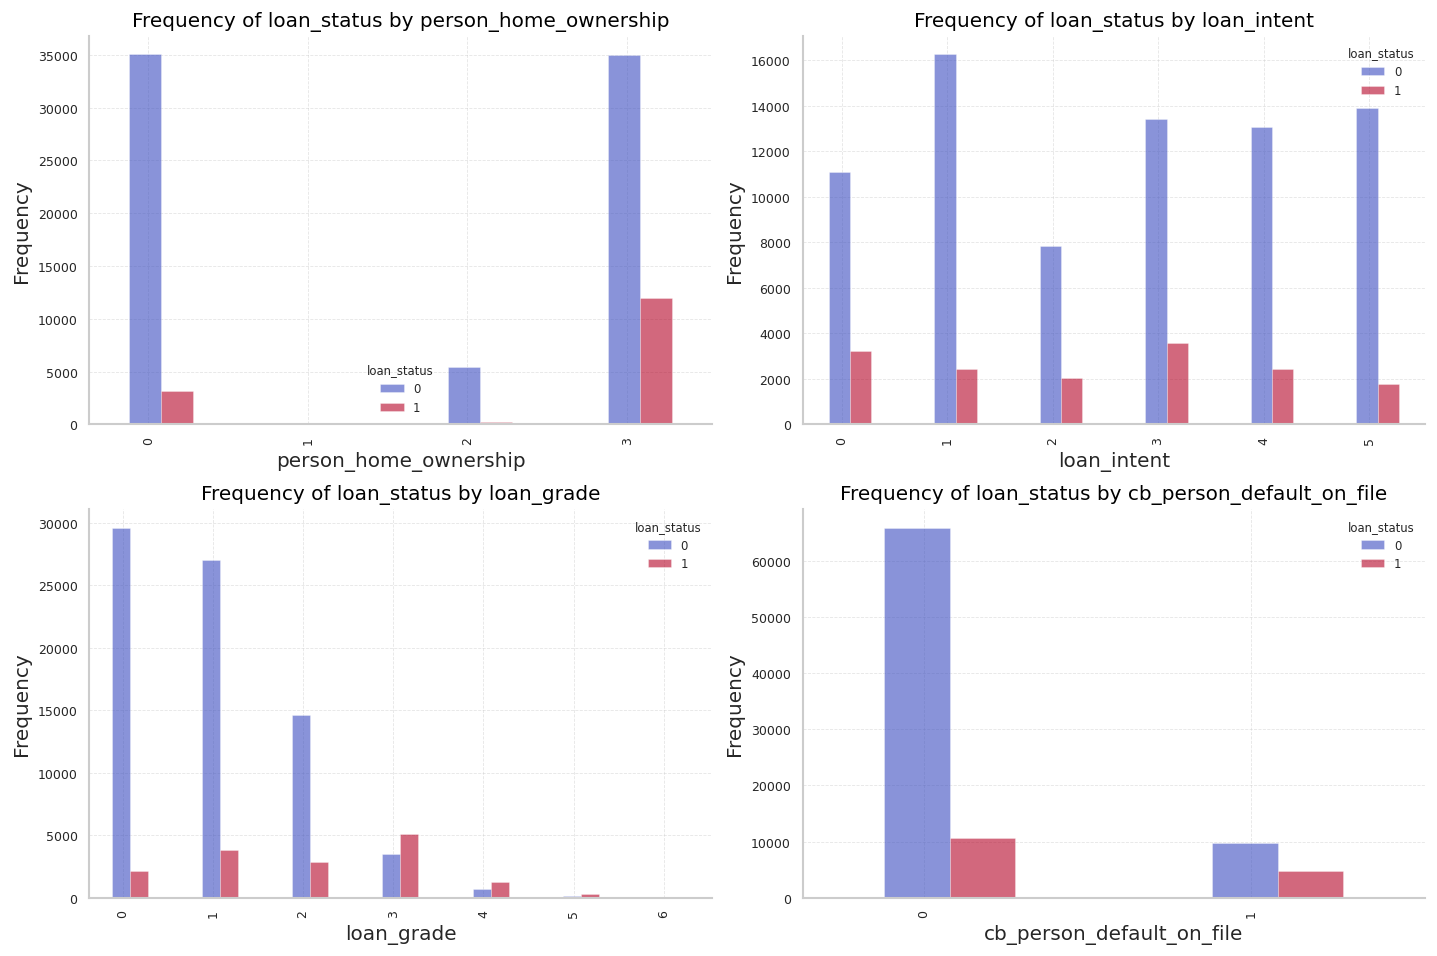

In [32]:
plot_instance = plot_class.plot_categorical_features(df=X_enc_y, target_variable="loan_status", features_cat=t.cat_features, features_num=t.num_features);

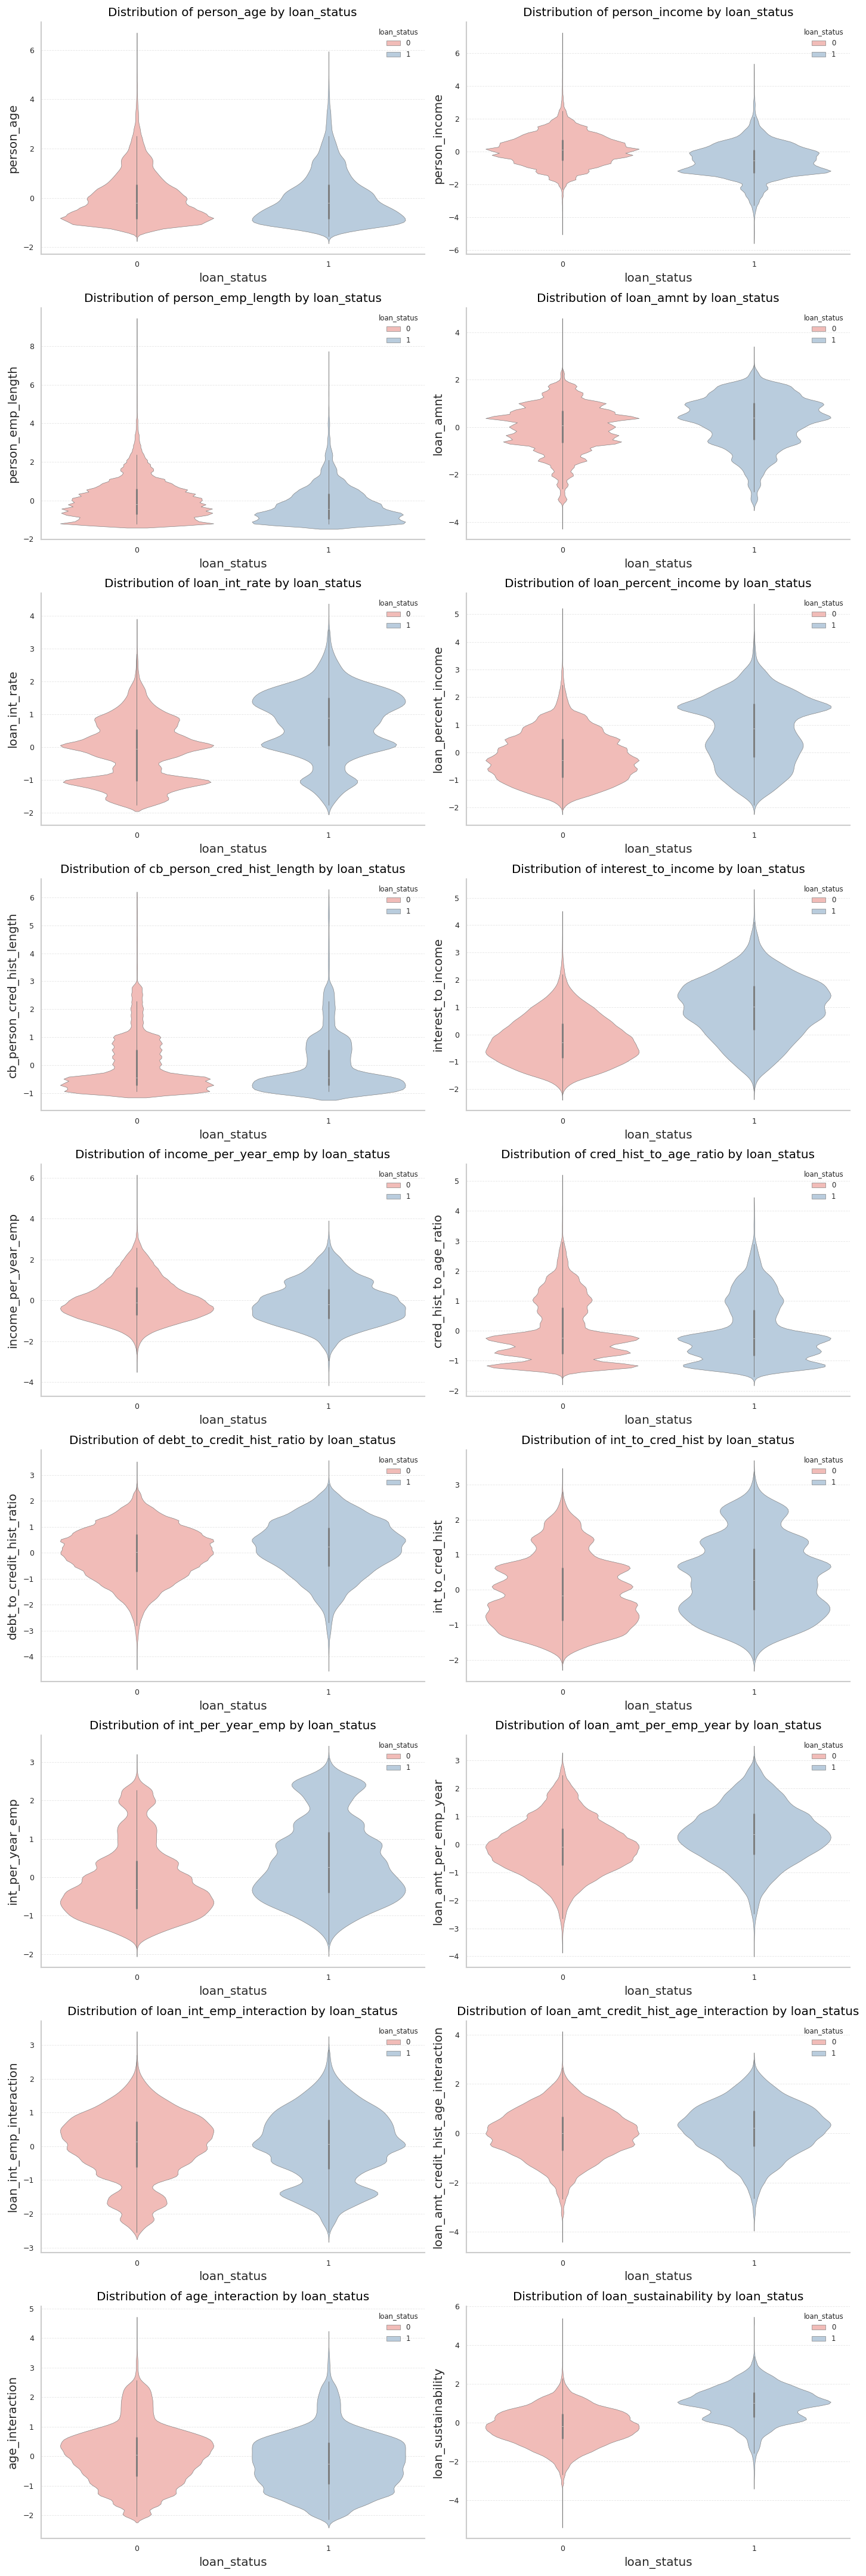

In [33]:
plot_instance.plot_numerical_features(df=X_enc_y, target_variable="loan_status", features_cat=t.cat_features, features_num=t.num_features);

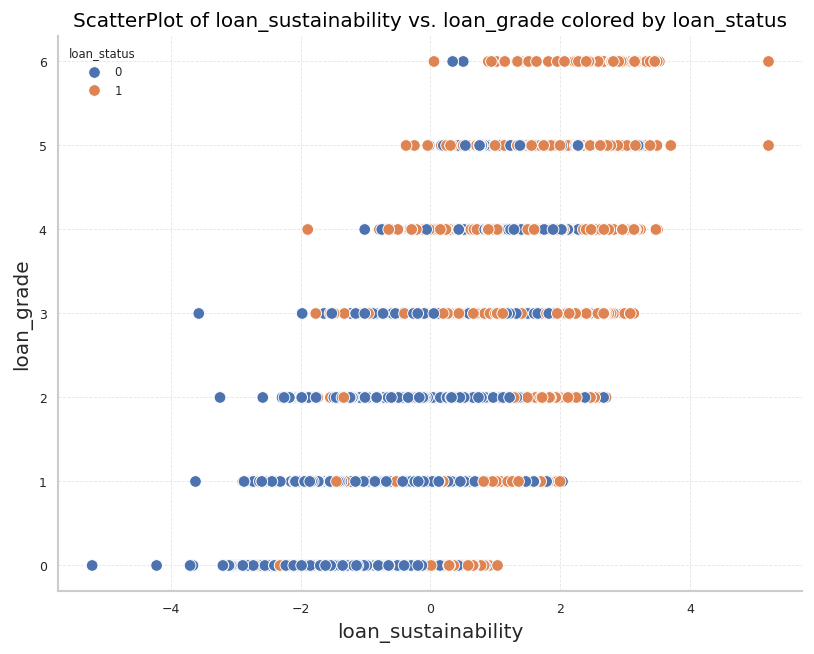

In [34]:
plot_instance.scatter_comp(feat_01="loan_sustainability", feat_02="loan_grade", hue_def="loan_status")


Correlation Heatmap



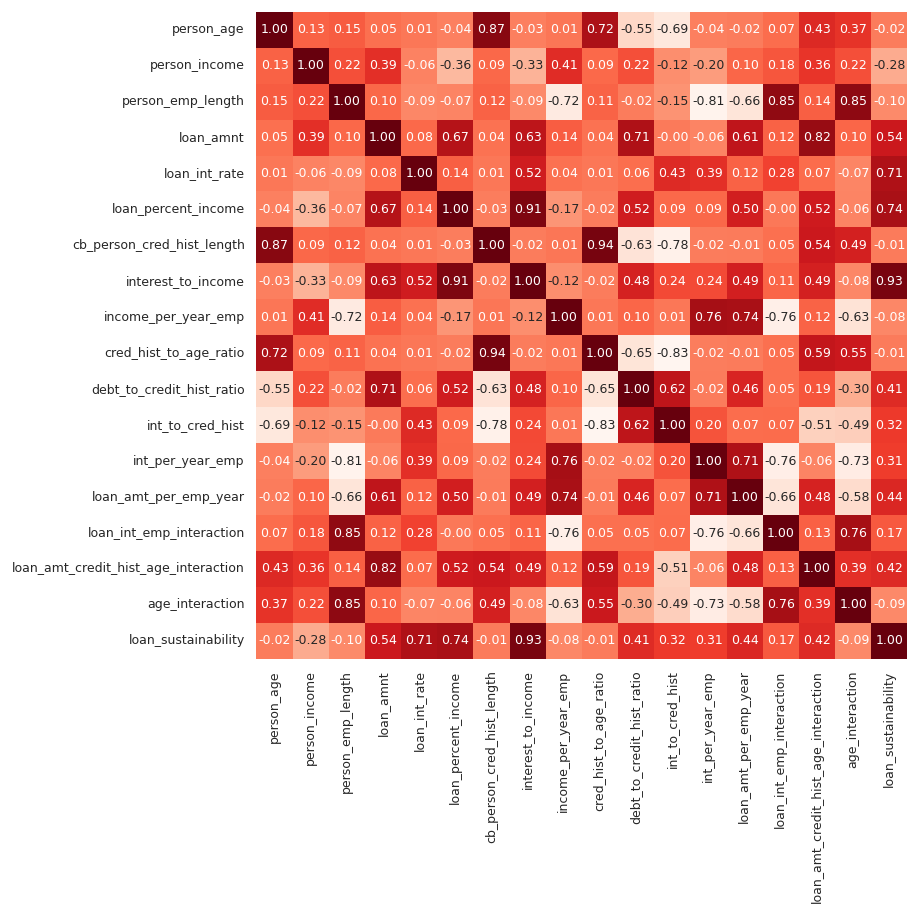

In [35]:
plot_instance.heatmap_corr()

## **4.0 MODELS**

--------------------

### **4.1 TREE BASED MODELS**

In [57]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights = dict(enumerate(class_weights))

sample_pos_weight = class_weights[1]/class_weights[0]
sample_pos_weight

4.898166742242664

#### 4.1.1 CatBoostClassifier:

### 2.1 Optuna Optimization:

In [58]:
def objective_catboost(trial, X, y, n_splits, n_repeats, model=CatBoostRegressor, use_gpu=True, rs=42, fit_scaling=False, cv_strategy="KFold"):

    model_class = model

    categorical_features = t.cat_features.copy()
    tot_cat = categorical_features

    num_cols = [col for col in X.columns if col not in tot_cat]

    params = {
        'iterations': 2501,
        'learning_rate': 0.025, #trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'depth': trial.suggest_int('depth', 7, 11),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-4, 0.1, log=True),
        "bootstrap_type": "Bernoulli",
        'subsample': trial.suggest_float('subsample', 0.75, 0.95,step=0.025),
        'random_strength': trial.suggest_float('random_strength', 0.0, 1.0),
        #'border_count': trial.suggest_int('border_count', 32, 255),
        'cat_features': categorical_features,
        'task_type': 'GPU' if use_gpu else 'CPU',
        'random_seed':rs,
        'verbose': 100,
        'objective': 'Logloss',
        'eval_metric': "AUC",
        "od_type":'EBS', #Early stopping hyperparmeter
        "od_wait":101,
        "scale_pos_weight":sample_pos_weight,
        "sampling_frequency":"PerTreeLevel",
        "use_best_model":True,
    }

    if cv_strategy == 'RepKFold':
      kf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=rs)
    elif cv_strategy == 'KFold':
      kf = KFold(n_splits=n_splits, random_state=rs, shuffle=True)
    elif cv_strategy == "StratKFold":
      kf = StratifiedKFold(n_splits=n_splits, random_state=rs, shuffle=True)
    elif cv_strategy == "RepStratKFold":
      kf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=rs)

    auc_scores = []

    for idx_train, idx_valid in kf.split(X, y):

        # Split the data into training and validation sets for the current fold
        X_train, y_train = X.iloc[idx_train], y.iloc[idx_train].to_numpy().reshape(-1,1)
        X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid].to_numpy().reshape(-1,1)

        if fit_scaling:
          scaler = StandardScaler()
          X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
          X_valid[num_cols] = scaler.transform(X_valid[num_cols])

        # Create the Pool objects for CatBoost
        train_pool = Pool(data=X_train, label=y_train, cat_features=categorical_features)
        valid_pool = Pool(data=X_valid, label=y_valid, cat_features=categorical_features)

        # Create the pipeline
        model = model_class(**params)
        # Fit the model:
        model.fit(train_pool, eval_set=valid_pool, early_stopping_rounds=101,
                  #callbacks=[optuna.integration.CatBoostPruningCallback(trial, "RMSE")]
                  )

        # Make predictions on the validation set
        y_pred = model.predict_proba(X_valid)[:, 1]

#        y_pred = np.expm1(y_pred)
#        y_valid = np.expm1(y_valid)

        # Calculate the RMSE for the current fold

        auc_score = roc_auc_score(y_valid, y_pred)
        auc_scores.append(auc_score)

    # Calculate the mean RMSLE score across all folds
    mean_auc_score = np.mean(auc_scores)

    return mean_auc_score

In [59]:
# Step 2: Tuning Hyperparameters with Optuna
def tune_hyperparameters(X, y, model_class, n_trials, n_splits_ ,n_repeats_, use_gpu=True):  #use_gpu
    study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(), pruner=optuna.pruners.MedianPruner(n_warmup_steps=50))
    study.optimize(lambda trial: objective_catboost(trial, X, y, n_splits=n_splits_, n_repeats=n_repeats_, model=model_class, use_gpu=use_gpu, cv_strategy="StratKFold"), n_trials=n_trials)
    return study  # Return the study object

# Step 3: Saving Best Results and Models
def save_results(study, model_class, model_name):
    best_params_file = f"{model_name}_best_params.joblib"
    joblib.dump(study.best_params, best_params_file)
    print(f"Best parameters for {model_name} saved to {best_params_file}")

    verbose_file = f"{model_name}_optuna_verbose.log"
    with open(verbose_file, "w") as f:
        f.write(str(study.trials))
    print(f"Optuna verbose for {model_name} saved to {verbose_file}")

In [60]:
# usage with XGBRegressor
cat_study = tune_hyperparameters(X_enc, y, model_class=CatBoostClassifier, n_trials=31, n_splits_ = 3 ,n_repeats_=3, use_gpu=False)
save_results(cat_study, CatBoostClassifier, "CatBoost_ext")
cat_params = cat_study.best_params

[I 2025-01-20 00:20:32,331] A new study created in memory with name: no-name-1710bea8-3da7-4bb2-8e8c-4c1f01e7ab10


0:	test: 0.9128588	best: 0.9128588 (0)	total: 680ms	remaining: 28m 18s
100:	test: 0.9355231	best: 0.9359176 (93)	total: 39.3s	remaining: 15m 34s
200:	test: 0.9367346	best: 0.9370326 (170)	total: 1m 19s	remaining: 15m 15s
Stopped by overfitting detector  (101 iterations wait)

bestTest = 0.9370325739
bestIteration = 170

Shrink model to first 171 iterations.
0:	test: 0.9050519	best: 0.9050519 (0)	total: 368ms	remaining: 15m 19s
100:	test: 0.9280381	best: 0.9280381 (100)	total: 38.8s	remaining: 15m 21s
200:	test: 0.9296374	best: 0.9302989 (134)	total: 1m 18s	remaining: 15m 2s
Stopped by overfitting detector  (101 iterations wait)

bestTest = 0.9302988585
bestIteration = 134

Shrink model to first 135 iterations.
0:	test: 0.9035814	best: 0.9035814 (0)	total: 338ms	remaining: 14m 5s
100:	test: 0.7364278	best: 0.9307314 (91)	total: 38.6s	remaining: 15m 18s


Training has stopped (degenerate solution on iteration 101, probably too small l2-regularization, try to increase it)



bestTest = 0.930731392
bestIteration = 91

Shrink model to first 92 iterations.


[I 2025-01-20 00:24:36,753] Trial 0 finished with value: 0.9326875464351838 and parameters: {'depth': 11, 'l2_leaf_reg': 0.0010524960577990255, 'subsample': 0.9, 'random_strength': 0.26094544935976083}. Best is trial 0 with value: 0.9326875464351838.


0:	test: 0.8989065	best: 0.8989065 (0)	total: 131ms	remaining: 5m 26s
100:	test: 0.9350248	best: 0.9350248 (100)	total: 15.8s	remaining: 6m 16s
200:	test: 0.9409758	best: 0.9409758 (200)	total: 31.6s	remaining: 6m 1s
300:	test: 0.9428456	best: 0.9428456 (300)	total: 48.3s	remaining: 5m 53s
400:	test: 0.9435479	best: 0.9436316 (384)	total: 1m 3s	remaining: 5m 35s
500:	test: 0.9450023	best: 0.9450023 (500)	total: 1m 20s	remaining: 5m 19s
600:	test: 0.9466958	best: 0.9467066 (599)	total: 1m 36s	remaining: 5m 5s
700:	test: 0.9479679	best: 0.9479791 (697)	total: 1m 54s	remaining: 4m 53s
800:	test: 0.9485435	best: 0.9486546 (781)	total: 2m 11s	remaining: 4m 38s
900:	test: 0.9485017	best: 0.9486939 (827)	total: 2m 28s	remaining: 4m 23s
Stopped by overfitting detector  (101 iterations wait)

bestTest = 0.948693888
bestIteration = 827

Shrink model to first 828 iterations.
0:	test: 0.8883180	best: 0.8883180 (0)	total: 146ms	remaining: 6m 4s
100:	test: 0.9317690	best: 0.9317690 (100)	total: 15.8

[I 2025-01-20 00:33:07,061] Trial 1 finished with value: 0.9464865912978918 and parameters: {'depth': 8, 'l2_leaf_reg': 0.003541599029222636, 'subsample': 0.95, 'random_strength': 0.5520522752909183}. Best is trial 0 with value: 0.9326875464351838.


0:	test: 0.8944638	best: 0.8944638 (0)	total: 108ms	remaining: 4m 29s
100:	test: 0.9342946	best: 0.9342946 (100)	total: 11.1s	remaining: 4m 23s
200:	test: 0.9404604	best: 0.9404604 (200)	total: 23.3s	remaining: 4m 26s
300:	test: 0.9441585	best: 0.9441585 (300)	total: 36.4s	remaining: 4m 25s
400:	test: 0.9461034	best: 0.9461034 (400)	total: 49.6s	remaining: 4m 19s
500:	test: 0.9477317	best: 0.9477317 (500)	total: 1m 2s	remaining: 4m 9s
600:	test: 0.9494161	best: 0.9494161 (600)	total: 1m 15s	remaining: 3m 57s
700:	test: 0.9502437	best: 0.9502483 (699)	total: 1m 27s	remaining: 3m 43s
800:	test: 0.9507844	best: 0.9508983 (784)	total: 1m 40s	remaining: 3m 33s
900:	test: 0.9511172	best: 0.9511315 (899)	total: 1m 54s	remaining: 3m 22s
1000:	test: 0.9512363	best: 0.9512363 (1000)	total: 2m 7s	remaining: 3m 11s
1100:	test: 0.9516026	best: 0.9516026 (1100)	total: 2m 21s	remaining: 2m 59s
1200:	test: 0.9517751	best: 0.9518114 (1153)	total: 2m 34s	remaining: 2m 47s
1300:	test: 0.9517110	best: 0.9

[I 2025-01-20 00:42:13,972] Trial 2 finished with value: 0.9504515522859931 and parameters: {'depth': 7, 'l2_leaf_reg': 0.017399706240168643, 'subsample': 0.75, 'random_strength': 0.25181463171714225}. Best is trial 0 with value: 0.9326875464351838.


0:	test: 0.8917152	best: 0.8917152 (0)	total: 134ms	remaining: 5m 34s
100:	test: 0.9335294	best: 0.9335294 (100)	total: 15s	remaining: 5m 56s
200:	test: 0.9384818	best: 0.9384818 (200)	total: 29.9s	remaining: 5m 42s
300:	test: 0.9409646	best: 0.9409646 (300)	total: 44.3s	remaining: 5m 23s
400:	test: 0.9422158	best: 0.9422579 (397)	total: 58.8s	remaining: 5m 8s
500:	test: 0.9444233	best: 0.9444233 (500)	total: 1m 14s	remaining: 4m 55s
600:	test: 0.9470932	best: 0.9470932 (600)	total: 1m 29s	remaining: 4m 43s
700:	test: 0.9485699	best: 0.9485699 (700)	total: 1m 45s	remaining: 4m 31s
800:	test: 0.9494965	best: 0.9494984 (797)	total: 2m 1s	remaining: 4m 17s
900:	test: 0.9499255	best: 0.9499342 (898)	total: 2m 17s	remaining: 4m 4s
1000:	test: 0.9501776	best: 0.9501922 (997)	total: 2m 33s	remaining: 3m 50s
1100:	test: 0.9501581	best: 0.9503122 (1045)	total: 2m 49s	remaining: 3m 35s
Stopped by overfitting detector  (101 iterations wait)

bestTest = 0.9503122211
bestIteration = 1045

Shrink mo

[I 2025-01-20 00:52:50,319] Trial 3 finished with value: 0.9488715669021305 and parameters: {'depth': 8, 'l2_leaf_reg': 0.07860703853055832, 'subsample': 0.775, 'random_strength': 0.7554072195206776}. Best is trial 0 with value: 0.9326875464351838.


0:	test: 0.9071324	best: 0.9071324 (0)	total: 350ms	remaining: 14m 36s
100:	test: 0.9351674	best: 0.9351674 (100)	total: 46.3s	remaining: 18m 19s
200:	test: 0.9378308	best: 0.9379552 (186)	total: 1m 12s	remaining: 13m 46s
Stopped by overfitting detector  (101 iterations wait)

bestTest = 0.9379552316
bestIteration = 186

Shrink model to first 187 iterations.
0:	test: 0.9005603	best: 0.9005603 (0)	total: 234ms	remaining: 9m 45s
100:	test: 0.9299332	best: 0.9299332 (100)	total: 26.7s	remaining: 10m 34s
200:	test: 0.9310709	best: 0.9315526 (177)	total: 1m 5s	remaining: 12m 24s
300:	test: 0.9317750	best: 0.9320896 (244)	total: 1m 44s	remaining: 12m 40s
Stopped by overfitting detector  (101 iterations wait)

bestTest = 0.9320895708
bestIteration = 244

Shrink model to first 245 iterations.
0:	test: 0.8926003	best: 0.8926003 (0)	total: 395ms	remaining: 16m 26s
100:	test: 0.9270895	best: 0.9270895 (100)	total: 31.9s	remaining: 12m 37s
200:	test: 0.9317580	best: 0.9318156 (191)	total: 1m 21s	r

[I 2025-01-20 00:58:56,861] Trial 4 finished with value: 0.9341550122756083 and parameters: {'depth': 10, 'l2_leaf_reg': 0.006325694148143524, 'subsample': 0.75, 'random_strength': 0.6508425695917355}. Best is trial 0 with value: 0.9326875464351838.


0:	test: 0.9053126	best: 0.9053126 (0)	total: 380ms	remaining: 15m 49s
100:	test: 0.9391568	best: 0.9391568 (100)	total: 35.1s	remaining: 13m 53s
200:	test: 0.9439892	best: 0.9439892 (200)	total: 1m 12s	remaining: 13m 44s
300:	test: 0.9459098	best: 0.9459098 (300)	total: 1m 41s	remaining: 12m 20s


[W 2025-01-20 01:00:40,453] Trial 5 failed with parameters: {'depth': 9, 'l2_leaf_reg': 0.019786424892420027, 'subsample': 0.95, 'random_strength': 0.12014362078331597} because of the following error: KeyboardInterrupt('').
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-59-e3ca0b2dd61c>", line 4, in <lambda>
    study.optimize(lambda trial: objective_catboost(trial, X, y, n_splits=n_splits_, n_repeats=n_repeats_, model=model_class, use_gpu=use_gpu, cv_strategy="StratKFold"), n_trials=n_trials)
  File "<ipython-input-58-363e603942aa>", line 61, in objective_catboost
    model.fit(train_pool, eval_set=valid_pool, early_stopping_rounds=101,
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, bas

KeyboardInterrupt: 

In [ ]:
X_enc.isna().sum()

In [ ]:
sample_pos_weight